In [1]:
import tensorflow as tf

In [2]:
import sys
print(sys.version)
print(tf.__version__)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
2.0.0-rc1


In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

** More on autoencoders in Keras **

[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

[Автоэнкодеры в Keras, Части 1-6](https://habrahabr.ru/post/331382/)

### MNIST data

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### FNN autoencoder

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2773 - val_loss: 0.1929
Epoch 2/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1722 - val_loss: 0.1544
Epoch 3/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1451 - val_loss: 0.1344
Epoch 4/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1292 - val_loss: 0.1220
Epoch 5/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1187 - val_loss: 0.1131
Epoch 6/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1115 - val_loss: 0.1075
Epoch 7/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1063 - val_loss: 0.1028
Epoch 8/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1024 - val_loss: 0.0996


In [14]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

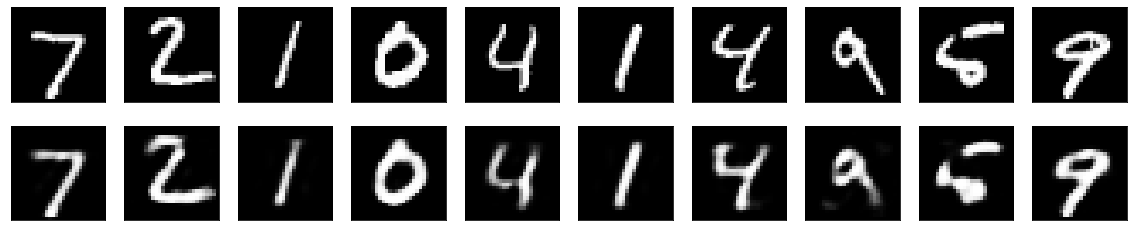

In [15]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
score = autoencoder.evaluate(x_test, x_test, verbose=0)

In [18]:
score

0.09166641685962677

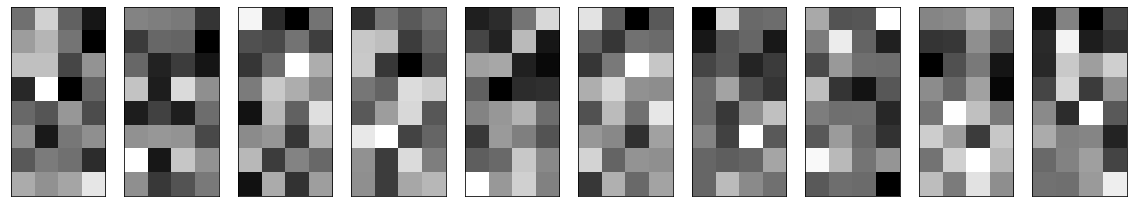

In [19]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep FNN autoencoder

In [20]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [21]:
deep_autoencoder = Model(input_img, decoded)
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
deep_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2481 - val_loss: 0.1705
Epoch 2/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1508 - val_loss: 0.1345
Epoch 3/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1295 - val_loss: 0.1229
Epoch 4/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1210 - val_loss: 0.1157
Epoch 5/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1150 - val_loss: 0.1109
Epoch 6/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1104 - val_loss: 0.1068
Epoch 7/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1065 - val_loss: 0.1038
Epoch 8/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1036 - val_loss: 0.1009
Epoch 9/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.10

Epoch 76/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0814 - val_loss: 0.0813
Epoch 77/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0813 - val_loss: 0.0810
Epoch 78/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0813 - val_loss: 0.0808
Epoch 79/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0812 - val_loss: 0.0809
Epoch 80/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0812 - val_loss: 0.0811
Epoch 81/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0812 - val_loss: 0.0810
Epoch 82/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0811 - val_loss: 0.0811
Epoch 83/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0810 - val_loss: 0.0808
Epoch 84/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0810 - val_loss: 0.0808
Epoch 85/100
60000/

In [23]:
# this model maps an input to its encoded representation
deep_encoder = Model(input_img, encoded)

In [24]:
deep_autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               1011

In [25]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input = Input(shape=(32,))

In [26]:
deep_decoder_layers = deep_autoencoder.layers[-3](deep_encoded_input)
deep_decoder_layers = deep_autoencoder.layers[-2](deep_decoder_layers)
deep_decoder_layers = deep_autoencoder.layers[-1](deep_decoder_layers)
deep_decoder = Model(deep_encoded_input, deep_decoder_layers)

In [27]:
encoded_imgs = deep_encoder.predict(x_test)
decoded_imgs = deep_decoder.predict(encoded_imgs)

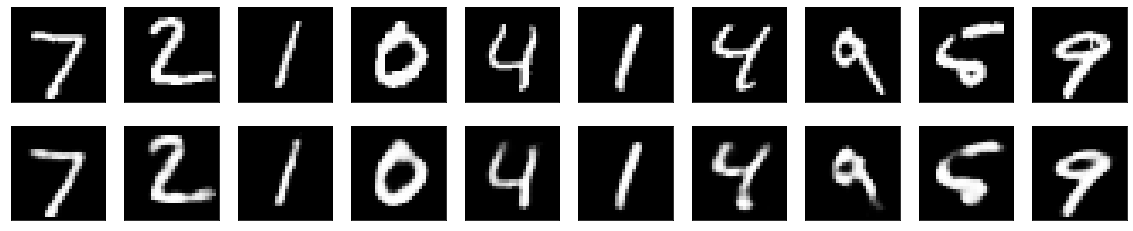

In [28]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [29]:
score = deep_autoencoder.evaluate(x_test, x_test, verbose=0)

In [30]:
score

0.08048202735185624

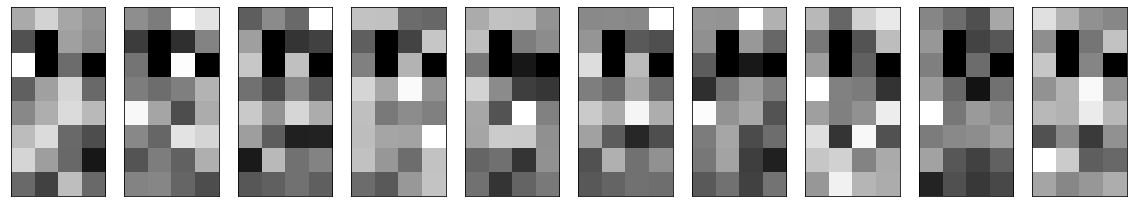

In [31]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep regularized FNN autoencoder

In [33]:
from tensorflow.keras import regularizers

In [34]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-7))(input_img)
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)
encoded = Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [35]:
deep_autoencoder_l1 = Model(input_img, decoded)
deep_autoencoder_l1.compile(optimizer='adam', loss='binary_crossentropy')

deep_autoencoder_l1.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2488 - val_loss: 0.1674
Epoch 2/50
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1520 - val_loss: 0.1385
Epoch 3/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1334 - val_loss: 0.1252
Epoch 4/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1226 - val_loss: 0.1169
Epoch 5/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1159 - val_loss: 0.1117
Epoch 6/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1110 - val_loss: 0.1088
Epoch 7/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1077 - val_loss: 0.1051
Epoch 8/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1054 - val_loss: 0.1030
Epoch 9/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1035 - val_

In [36]:
# this model maps an input to its encoded representation
deep_encoder_l1 = Model(input_img, encoded)

In [37]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input_l1 = Input(shape=(32,))

In [38]:
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-3](deep_encoded_input_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-2](deep_decoder_layers_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-1](deep_decoder_layers_l1)
deep_decoder_l1 = Model(deep_encoded_input_l1, deep_decoder_layers_l1)

In [39]:
encoded_imgs = deep_encoder_l1.predict(x_test)
decoded_imgs = deep_decoder_l1.predict(encoded_imgs)

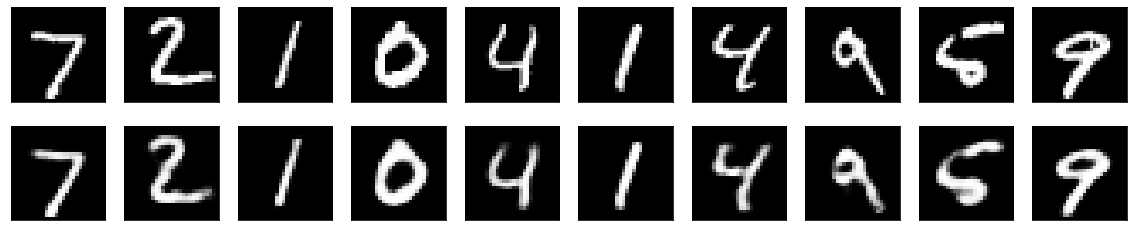

In [40]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [41]:
score = deep_autoencoder_l1.evaluate(x_test, x_test, verbose=0)

In [42]:
score

0.08409563837051391

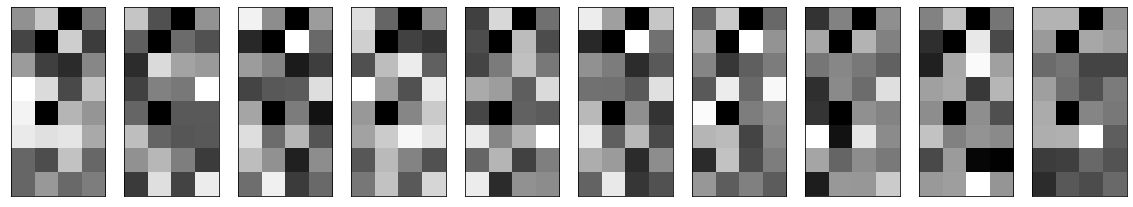

In [43]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Denoising autoencoder

In [44]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

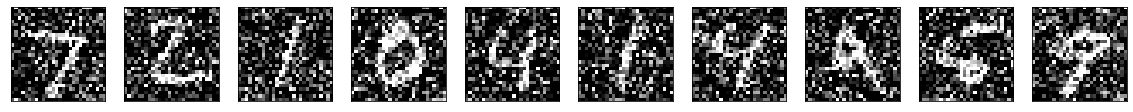

In [45]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
x_train_noisy = x_train.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [47]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [48]:
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2423 - val_loss: 0.2520
Epoch 2/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1483 - val_loss: 0.2784
Epoch 3/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1306 - val_loss: 0.2783
Epoch 4/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1214 - val_loss: 0.2934
Epoch 5/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1157 - val_loss: 0.3173
Epoch 6/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1113 - val_loss: 0.3222
Epoch 7/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1080 - val_loss: 0.3242
Epoch 8/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1052 - val_loss: 0.3197
Epoch 9/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1029 - val_

In [49]:
denoising_encoder = Model(input_img, encoded)
denoising_input = Input(shape=(32,))
denoising_decoder_layers = denoising_autoencoder.layers[-3](denoising_input)
denoising_decoder_layers = denoising_autoencoder.layers[-2](denoising_decoder_layers)
denoising_decoder_layers = denoising_autoencoder.layers[-1](denoising_decoder_layers)
denoising_decoder = Model(denoising_input, denoising_decoder_layers)

encoded_imgs = denoising_encoder.predict(x_test_noisy)
decoded_imgs = denoising_decoder.predict(encoded_imgs)

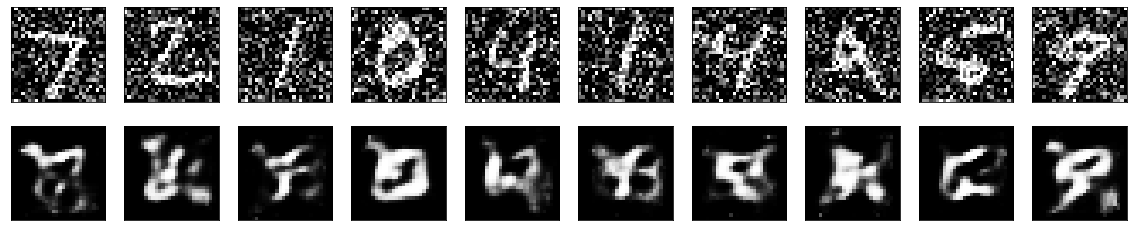

In [50]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### What´s next?

* Convolutional autoencoders
* Sequence-to-sequence autoencoder
* Variational autoencoders (VAE)
* GANs